<a href="https://colab.research.google.com/github/dana-fatemeh/case_study1_MLforEng/blob/main/CaseStudy_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polymer Melt Flow Rate

This case study is based upon the excellent example below:

http://apmonitor.com/pds/index.php/Main/PolymerMeltFlowRate

Along with its github repository:

https://github.com/APMonitor/pds

and license:

https://github.com/APMonitor/pds/blob/main/LICENSE

In particular, as described on the web page above:

Polymer properties such as density, melt index, and melt flow rate must be kept within tight specifications for each grade. This case study is to analyze polymer production data to predict melt flow rate.

**Background:** There are gas phase and liquid slurry reactors that create polymers (polyethylene, polypropylene, polystyrene, and others) from chemical building blocks known as monomers (C2=, C3=, C4=, iC5=, and others). A catalyst is injected with the monomers under carefully controlled temperature and pressure conditions to cause a reaction that grows the polymer chains. Hydrogen is a chain transfer agent to stop the growth of the polymer chain. If the polymer chains grow too long then the polymer is too viscous for manufacturing in films, injection molding, or other applications.

This case study focuses on measurements of Melt Flow Rate (MFR) to determine the polymer viscosity based on reactor conditions. An accurate model is desirable so that the infrequent lab samples (every 2-8 hours) are supplemented with a virtual and continuous "soft sensor". A model that runs in real-time simulation alongside the physical reactor is called a digital twin.

| Label | Data File Tag   | Description |
|------|------|------|
|   Time  | | Timestamp of the measurements|
|   C3  | 513FC31103.pv| Propylene (C3=) Feed Rate (kg/hr)|
|   H2R  | 513HC31114-5.mv| Hydrogen to C3= Ratio|
|   Pressure  | 513PC31201.pv| Reactor Pressure (bar)|
|   Level  | 513LC31202.pv| Reactor Bed Level (m)|
|   C2  | 513FC31409.pv| Ethylene (C2=) Flow (kg/hr)|
|   Cat  | 513FC31114-5.pv| Catalyst Feed Rate (kg/hr)|
|   Temp  | 513TC31220.pv| Reactor Temperature|
|   MFR  | MFR| Melt Flow Rate (gm/10min)|

**References**

Hedengren, J. D. (2021, December 16). Polymer Melt Flow Rate, Machine Learning for Engineers. Retrieved from http://apmonitor.com/pds/index.php/Main/PolymerMeltFlowRate



# Naive solution

### Import Polymer MFR Data


Don't worry, the data has been cached on the github page for this class so you can access it directly by url. Easy!

In [19]:
url = 'https://raw.githubusercontent.com/rcpaffenroth/DS5006-Machine-Learning-for-Engineering-and-Science-Applications/main/data/polymer_reactor.txt'
# url = 'polymer_reactor.txt'

Let's read the data through pandas.  It would be great to get to know pandas. It is an important tool for Data Science in Python.

![Book cover](https://images-na.ssl-images-amazon.com/images/I/51HuYEwAl2L._SX258_BO1,204,203,200_.jpg)

https://images-na.ssl-images-amazon.com/images/I/51HuYEwAl2L._SX258_BO1,204,203,200_.jpg

In [20]:
import pandas as pd

# We can pass the url directly into pandas read_csv file
# to read a dataframe directly
data = pd.read_csv(url)

In [21]:
data

Unnamed: 0  513FC31103.pv  513HC31114-5.mv  513PC31201.pv  \
0       04-05-18 19:45      24856.584            0.153      30.414835   
1       04-05-18 21:45      25537.250            0.153      30.527121   
2       04-05-18 23:45      25689.266            0.153      30.356180   
3        04-06-18 1:45      25098.754            0.153      30.894308   
4        04-06-18 3:45      24853.941            0.150      30.680647   
...                ...            ...              ...            ...   
2559     12-10-18 9:45      24437.988            0.185      31.025928   
2560  12/17/2018 16:45            NaN              NaN            NaN   
2561  12/17/2018 18:45            NaN              NaN            NaN   
2562   12/27/2018 5:45            NaN              NaN            NaN   
2563  12/31/2018 23:45            NaN            0.000            NaN   

      513LC31202.pv  513FC31409.pv  513FC31114-5.pv  513TC31220.pv   MFR  
0         79.657906      50850.578         0.163994      80.399605   3.4  
1         78.532608      42229.813         0.129739      78.861328   3.2  
2         78.842636      45335.852         0.150003      78.818115   3.2  
3         79.173500      43077.016         0.151543      79.022720   3.1  
4         78.677299      40404.387         0.122582      79.038483   3.3  
...             ...            ...              ...            ...   ...  
2559      77.189499      24022.730         0.103966      81.783371  12.3  
2560            NaN            NaN              NaN            NaN   3.5  
2561            NaN            NaN              NaN            NaN   4.0  
2562            NaN            NaN              NaN            NaN   3.7  
2563            NaN            NaN              NaN            NaN   3.4  

[2564 rows x 9 columns]

What does all this mean? 513FC31103.pv	513HC31114-5.mv	513PC31201.pv	513LC31202.pv	513FC31409.pv	513FC31114-5.pv	513TC31220.pv.   What do the column labels mean?  You probably want to map them to something more meaningful.

![?](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2W-Aq7YoFONiyUsix1x8wXnlesgqEyDShTA&usqp=CAU)

In [22]:
data = data.set_axis(['Time','C3','H2R','Pressure','Level','C2','Cat','Temp','MFR'], axis=1)

In [23]:
data

Time         C3    H2R   Pressure      Level         C2  \
0       04-05-18 19:45  24856.584  0.153  30.414835  79.657906  50850.578   
1       04-05-18 21:45  25537.250  0.153  30.527121  78.532608  42229.813   
2       04-05-18 23:45  25689.266  0.153  30.356180  78.842636  45335.852   
3        04-06-18 1:45  25098.754  0.153  30.894308  79.173500  43077.016   
4        04-06-18 3:45  24853.941  0.150  30.680647  78.677299  40404.387   
...                ...        ...    ...        ...        ...        ...   
2559     12-10-18 9:45  24437.988  0.185  31.025928  77.189499  24022.730   
2560  12/17/2018 16:45        NaN    NaN        NaN        NaN        NaN   
2561  12/17/2018 18:45        NaN    NaN        NaN        NaN        NaN   
2562   12/27/2018 5:45        NaN    NaN        NaN        NaN        NaN   
2563  12/31/2018 23:45        NaN  0.000        NaN        NaN        NaN   

           Cat       Temp   MFR  
0     0.163994  80.399605   3.4  
1     0.129739  78.861328   3.2  
2     0.150003  78.818115   3.2  
3     0.151543  79.022720   3.1  
4     0.122582  79.038483   3.3  
...        ...        ...   ...  
2559  0.103966  81.783371  12.3  
2560       NaN        NaN   3.5  
2561       NaN        NaN   4.0  
2562       NaN        NaN   3.7  
2563       NaN        NaN   3.4  

[2564 rows x 9 columns]

Nice, now I know what they are. 🙂

## Regression Modeling

Now, we have the data and we know what they are. We learned a lot from Randy's 🧙 lecture and can't wait to try the machine learning algorithms. Let's start.

### Divide Data

What is the first step? Wow, Randy 🧙  said we need to divide the training set and the test set.

"Data is divided into train and test sets to separate a fraction of the rows for evaluating classification or regression models. A typical split is 80% for training and 20% for testing, although the range depends on how much data is available and the objective of the study."

The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

```python
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)
```

There are options such as `shuffle=True` to randomize the selection in each set.

One of those arguments is `random_state`; this argument, when set to a value, determines which rows go into the train and test splits. Make a mental note of the value we set, we may see it again later in the notebook! 🧙

In [24]:
# !pip install scikit-learn
from sklearn.model_selection import train_test_split

# note how we set the random_state
train,test = train_test_split(data, test_size=0.2, shuffle=True, random_state=1)

Can't wait any longer to run the model?


#### Run model
Let's try linear regression using sklearn!

In [25]:
from sklearn import linear_model
method = linear_model.LinearRegression()

What columns are used as features? What columns are used as labels?
Don't know? Then let's use them all first, except for time, since time is not important in this case.

**Features：**`C3, H2R, Pressure, Level, C2, Cat, Temp`

**label：** `MFR`


In [26]:
# We call method.fit() to learn the parameters of our network
# to the specific data

model = method.fit(
   X = train[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),
   y = train['MFR'].to_numpy())

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: Input contains NaN????

![?](https://www.memecreator.org/static/images/memes/4724747.jpg)

Wow! We forgot to check if there are any null values in the dataset. 😞


`data.isnull()`  is used to check if there is null value in the dataset. We can sum them by using sum().

`data.info()` and `data.describe()` are usually used to check the properties and basic statistics of the data.

In [30]:
# Let's check how many total missing values exist in our training set
train.isnull().sum().sum()

np.int64(0)

In [31]:
# Let's do the same for the test set we made
test.isnull().sum().sum()

np.int64(49)

In [32]:
# use train.info() to get each column's number of non-missing values (Non-Null Count)
# Note: train.info() is also useful to see what kind a data type (Dtype) pandas
  # has encoded the columns. Sometimes pandas might mistakenly think a column of numbers
  # is actually a column of strings, so always check beforehand!
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 1093 to 1061
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      1979 non-null   object 
 1   C3        1979 non-null   float64
 2   H2R       1979 non-null   float64
 3   Pressure  1979 non-null   float64
 4   Level     1979 non-null   float64
 5   C2        1979 non-null   float64
 6   Cat       1979 non-null   float64
 7   Temp      1979 non-null   float64
 8   MFR       1979 non-null   float64
dtypes: float64(8), object(1)
memory usage: 154.6+ KB


In [33]:
train.describe()

C3          H2R     Pressure        Level             C2  \
count   1979.000000  1979.000000  1979.000000  1979.000000    1979.000000   
mean   25340.155300     0.184174    30.659640    77.659450   42662.841313   
std     1701.594869     0.073464     0.432810     0.930477   11375.945853   
min    16106.025000     0.000000    26.946344    74.575958    9610.464800   
25%    24397.344500     0.140000    30.444627    76.994495   34932.478500   
50%    25393.379000     0.175000    30.618645    77.501343   41954.355000   
75%    26431.130500     0.202000    30.928010    78.233005   50109.232500   
max    30083.688000     0.980000    32.674332    83.841675  106073.610000   

               Cat         Temp          MFR  
count  1979.000000  1979.000000  1979.000000  
mean      0.138523    80.137342     8.054472  
std       0.042081     0.846325     5.069730  
min       0.022162    77.760117     1.500000  
25%       0.113723    79.666259     3.700000  
50%       0.132635    80.035500     4.300000  
75%       0.157135    80.497383    12.700000  
max       0.677979    91.566544    38.000000

Yes, null values do exist in the dataset, let's delete them first.

`data.dropna()` is used to remove the rows that contain at least one null value.

In [34]:
# assign new variables to versions of the data with no
# missing values
train_dropna = train.dropna()
test_dropna = test.dropna()

In [35]:
train_dropna.isnull().sum().sum()

np.int64(0)

In [36]:
test_dropna.isnull().sum().sum()

np.int64(0)

Now, let's try to run the model again!

In [37]:
model = method.fit(
    X=train_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),
    y=train_dropna['MFR'].to_numpy())

Great!!! The model was successfully fit！ 🙂 Now, we can evaluate the performance on test set.

In [38]:
from sklearn.metrics import mean_squared_error
r2 = method.score(test_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),test_dropna['MFR'].to_numpy())
mse = mean_squared_error(method.predict(test_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy()), test_dropna['MFR'].to_numpy())

print('R^2: ' + str(r2))
print('mse: ' + str(mse))

R^2: 0.42624499119957326
mse: 14.935927259730697


Ok, we already see things are interesting.  There are two different metrics (R^2 and mse)!   Hmmm....

## **Question 1** **(10 points)**

**Part 1 (5 points)**

What do R^2 and mse mean? Which is better for describing the performance of your algorithm?  Why?

__Answer__:
- R^2: test push
- MSE (mean squared error):

**Part 2 (5 points)**  

Try different variables to fit the model and test its performance.   What do you notice?  Are some worse and some better?

Hint:
`model = method.fit(train_dropna[['Your selected variable 1', 'Your selected variable 2']].to_numpy(),train_dropna['MFR'].to_numpy())`

## **Answer 1**

Part 1: 𝑅^2 tells us how much of the variation in the real target values (MFR) is explained by the model. An 𝑅^2 of 1 means the model explains everything perfectly, 0 means it's no better than just predicting the average, and it can even be negative if the model is worse than that baseline.
MSE (mean squared error) is the average of (prediction − true)^2. It directly measures how far predictions are from the real values, and smaller is better. Because it squares the errors, it also punishes large mistakes more. In practice, both are useful, but if we want to understand how wrong our predictions are in a concrete way, MSE is usually more informative because it directly reflects prediction error size. 𝑅^2 is helpful as a quick explanation summary, but it doesn't tell you the real error magnitude.


Part 2: When we try different sets of variables, the performance changes. Some combinations give a higher 𝑅^2 and lower MSE (better), and some give a lower 𝑅^2 and higher MSE (worse). In general, variables that have a real relationship with MFR improve the results, while weak or noisy variables don't help much and can sometimes make test performance worse. Also, adding more variables does not always improve the model. If the new variables don't add new information or they are redundant, the improvement can be small.


In [27]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train = train.dropna(subset=['C3','H2R','Pressure','Temp','Cat','Level','MFR'])

def eval_features(feature_list, target='MFR'):
    X_train = train[feature_list].to_numpy()
    y_train = train[target].to_numpy()

    X_test = test_dropna[feature_list].to_numpy()
    y_test = test_dropna[target].to_numpy()

    model = LinearRegression().fit(X_train, y_train)

    r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, model.predict(X_test))

    print(f"Features: {feature_list}")
    print(f"R^2: {r2:.4f}")
    print(f"MSE: {mse:.4f}\n")

eval_features(['C3', 'H2R', 'Pressure', 'Temp'])
eval_features(['Cat', 'Level'])


Features: ['C3', 'H2R', 'Pressure', 'Temp']
R^2: 0.3487
MSE: 16.9550

Features: ['Cat', 'Level']
R^2: 0.0536
MSE: 24.6358



# Solution with Feature Engineering

How did you choose the variables? Why use these variables instead of others?

![?](https://media.makeameme.org/created/its-a-feature-5b167b.jpg)

How about we create a heatmap to show the correlation between the variables?

In [28]:
# import plotting libraries:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

Still remember? Removing null values.

In [29]:
data = data.dropna()

In [40]:
# Drop the Time column in data, added try-pass block to be able to re-run without throwing error that "Time" column is already gone
try:
    data = data.drop(['Time'], axis=1)
except:
    pass
data # cleaned dataset (no NaN's, no Time)

C3    H2R   Pressure      Level         C2       Cat       Temp  \
0     24856.584  0.153  30.414835  79.657906  50850.578  0.163994  80.399605   
1     25537.250  0.153  30.527121  78.532608  42229.813  0.129739  78.861328   
2     25689.266  0.153  30.356180  78.842636  45335.852  0.150003  78.818115   
3     25098.754  0.153  30.894308  79.173500  43077.016  0.151543  79.022720   
4     24853.941  0.150  30.680647  78.677299  40404.387  0.122582  79.038483   
...         ...    ...        ...        ...        ...       ...        ...   
2555  21437.066  0.180  31.306507  76.762871  13607.478  0.081950  79.421646   
2556  25108.557  0.180  29.496073  76.608147  43186.836  0.131283  81.863571   
2557  20050.275  0.250  31.061733  76.629868  31100.949  0.094293  80.764282   
2558  21003.520  0.185  27.864731  77.518692  52186.004  0.137511  83.706100   
2559  24437.988  0.185  31.025928  77.189499  24022.730  0.103966  81.783371   

       MFR  
0      3.4  
1      3.2  
2      3.2  
3      3.1  
4      3.3  
...    ...  
2555  11.8  
2556  11.2  
2557  11.4  
2558  13.5  
2559  12.3  

[2484 rows x 8 columns]

we can create a heatmap using `seaborn.heatmap()`

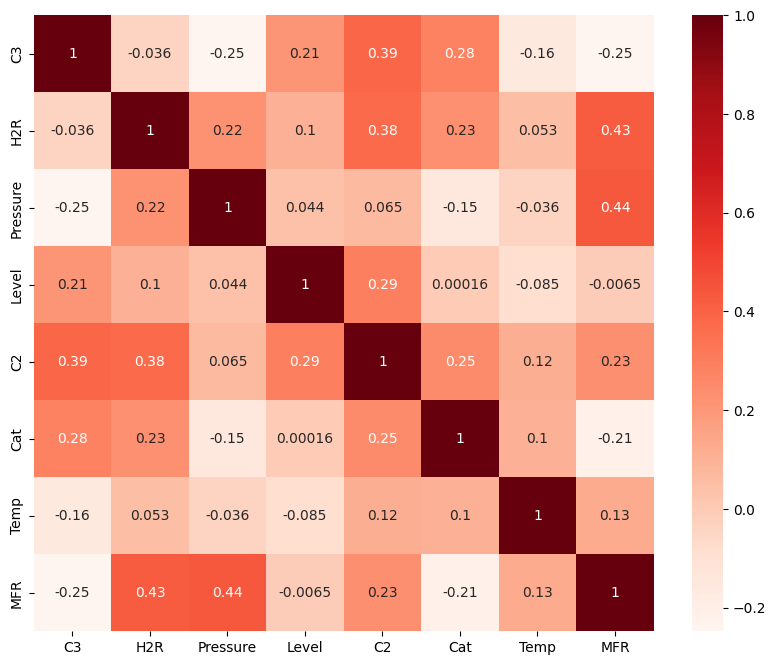

In [41]:
plt.figure(figsize=(10,8))

cor = data.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

## **Question 2** **(20 points)**

**Part 1 (5 points)**
What does correlation mean?

__Answer__: the Pandas ```.corr()``` function, without any parameters will - by default - compute the _Pearson Correlation Coefficient (PCC)_. The PCC measures the linear correlation between data normalized to the range of -1 to 1, where 1 is a result of a perfect positive _linear_ correlation, -1 a perfect negative _linear_ correlation and where 0 means no _linear_ correlation. So here, "correlation" refers to the linear fit of the individual datastreams with eachother - like how "Pressure" linearly relates to "Temp" in ```data```.

**Part 2 (10 points)**
What are your observations? Which variables are strongly correlated with `MFR` and which variables are weakly correlated with `MFR`?

__Answer__: the variables "H2R", "Pressure", and trivially "MFR" all have the _strongest_ (positive) correlations with `MFR`, though I would clasify "strong" as a lot closer to -1 or 1. "Level" has nearly no correlation, and all the rest are weakly correlated with `MFR`.


**Part 3 (5 points)**
Is a variable with a large *negative* correlation useful or not?

__Answer__: Of course! A correlation is a correlation, does not matter which direction their trend goes, just that the trend is there.



### Pair Plot

A pair plot shows the correlation between variables.

```python
sns.pairplot(data)
```

It has bar distributions on the diagonal and scatter plots on the off-diagonal. A pair plot also shows a different color (`hue`) by category `w`. Pair plots show correlations between pairs of variables that may be related and gives a good indication of features (explanatory inputs) that are used for classification or regression. Generate your own pair plot of the data.

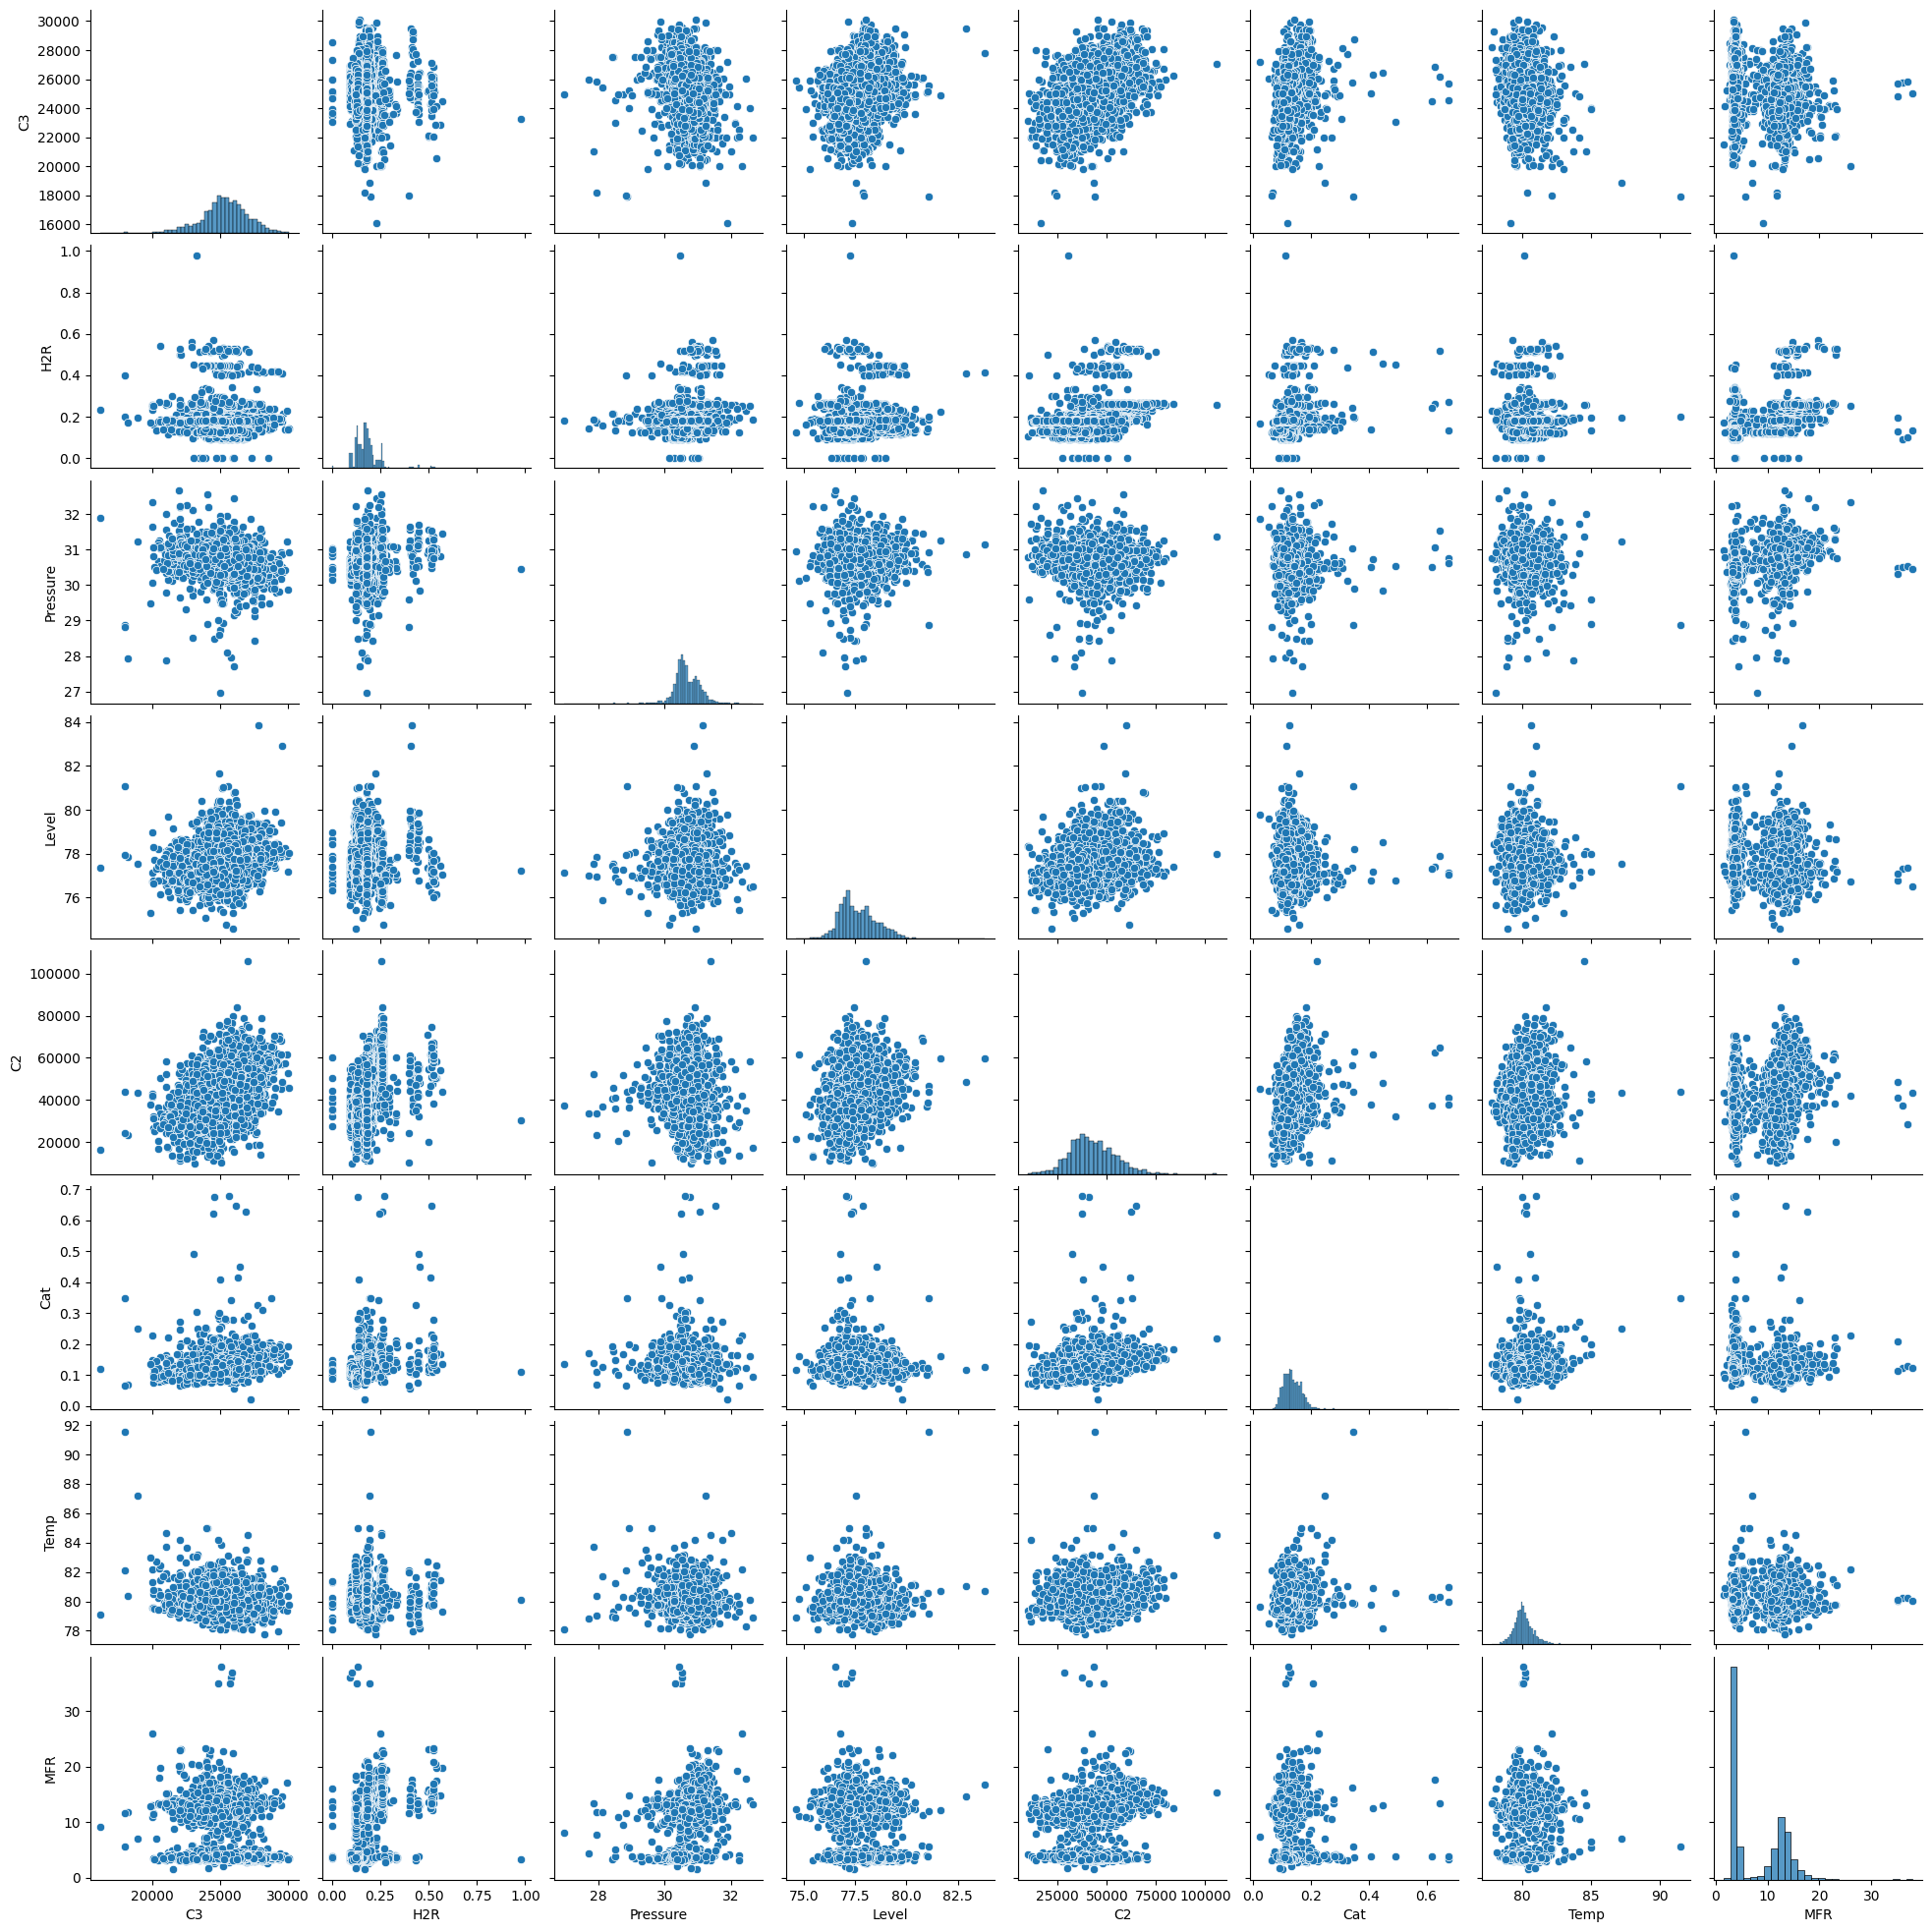

In [42]:
sns.pairplot(data) # This will run for a little bit

### Joint Plot

Want to change the plot style? No problem! 👌

A joint plot shows two variables, with the univariate and joint distributions.

```python
sns.jointplot(x='H2R',y='MFR',data=data,kind="kde")
```

Generate your own joint plot with the data. Try `kind='reg'`, `'kde'`, and `'hex'` to see different joint plot styles.

In [ ]:
sns.jointplot(x='H2R',y='MFR',data=data,kind="kde") # Professor's default plot
sns.jointplot(x='H2R',y='MFR',data=data,kind="hex") # plot Ed made to test another style

### Data Analysis with `ydata-profiling` (formerly known as pandas-profiling)

ydata - Profiling is a data analysis tool for a more in-depth summary of the data than the `descibe()` function. [Install the package](https://docs.profiling.ydata.ai/latest/getting-started/installation/) with:

```python
pip install --user ydata-profiling[notebook]
jupyter nbextension enable --py widgetsnbextension
```

<!-- **This idea is important!** You will need to install more packages than Colab provides, and this is an example of doing that.

NOTE:  You need to restart the Kernel before proceeding. The install only needs to run once.  We will talk about this in class. -->

In [43]:
# first need to uninstall a conflicting version of a package,
# then install ydata-profiling
#!pip uninstall typing-extensions -y
#!pip install -U ydata-profiling[notebook] typing-extensions==4.6.0

# this line allows to use cool interactive widgets with a notebook
# which we will see in action in a few code cells below
#!jupyter nbextension enable --py widgetsnbextension
!pip install ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 7.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 3.5 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [44]:
from ydata_profiling import ProfileReport

In [45]:
# here we generate the big report
profile = ProfileReport(data, minimal=False)

ProfileReport takes a little time to render the results, please be patient. Next, we can view the report interactively with `profile.to_widgets()`

IMPORTANT NOTE: If you run the following cell and nothing appears, or you get some sort of warning message, try re-running the `profile = ProfileReport(data, minimal=False)` cell again, and then re-run `profile_to_widgets()` cell. The ProfileReport can be a little finicky with Colab.

In [46]:
# This will make nice interface in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 80.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Question 3** **(10 points)**

Notice that the output of the previous cell is a collection of interactive tabs that contain useful information about our data. Expore the tabs to get familiar with why type of information is present.

Next, find the two most "relevant" variables to `MFR` and fit them with linear regression. Cut and paste their "Interaction" plots here.  Why do you think they are relevant?

Compare the results (r^2 and mse) using these variables with your previous experiments.

__Answer__: PROVIDE YOUR EXPLANATIONS HERE


## **Answer 3**

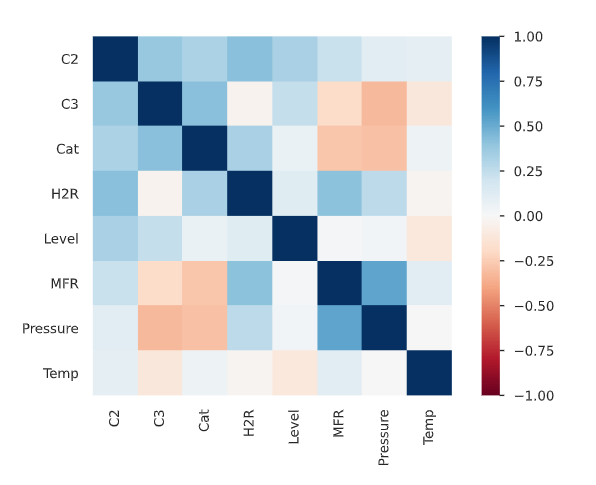

From the interaction plots (ex: heatmap for correlation between features), Pressure and H2R look like the two variables that matter the most for predicting MFR (H2R_cor = 0.43 and Pressure_cor = 0.44). Their plots show a clearer pattern with MFR compared to the other inputs, so they don’t look like random scatter.
When we fit a linear regression using only Pressure and H2R, the performance is okay, but it is not as good as using all the variables. With only those two features, the test 𝑅^2 is about 0.328 and the MSE is about 17.505. With all seven features, the test 𝑅^2 improves to about 0.426 and the MSE drops to about 14.936 (please see the code bellow:). This tells us Pressure and H2R are important, but the other variables still add useful information that helps the model make better predictions.

In [47]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def eval_features(train_df, test_df, features, target='MFR'):
    X_train = train_df[features].to_numpy()
    y_train = train_df[target].to_numpy()

    X_test = test_df[features].to_numpy()
    y_test = test_df[target].to_numpy()

    model = LinearRegression().fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, model.predict(X_test))

    print("Features:", features)
    print("R^2:", r2)
    print("MSE:", mse)
    print()


eval_features(train, test_dropna, ['Pressure', 'H2R'])

eval_features(train, test_dropna, ['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp'])


Features: ['Pressure', 'H2R']
R^2: 0.3275641298547487
MSE: 17.504776584559064

Features: ['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']
R^2: 0.42624499119957326
MSE: 14.935927259730697



Tired of manually selecting variables? We can use the model to select best features (variables) automatically.

### Select Best Features

We can rank the features to determine the best set that predicts `MFR`.

```python
from sklearn.feature_selection import SelectKBest, f_regression
best = SelectKBest(score_func=f_regression, k='all')
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)
```

There is additional information on [Select K Best Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<BarContainer object of 7 artists>

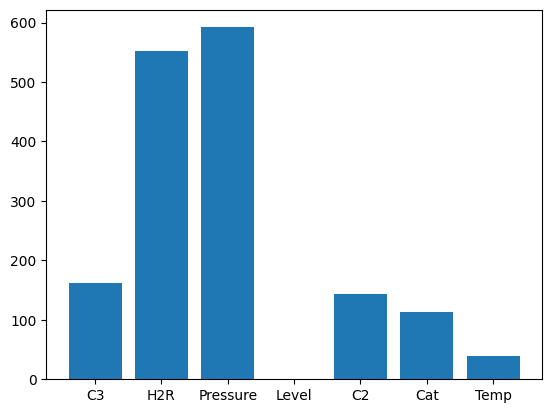

In [48]:
x=data[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']]
z=data[['MFR']]

# These are various feature selection algorithms available
from sklearn.feature_selection import SelectKBest, f_regression
# import matplotlib.pylab as plt # ED: commented this out since we already have plt from an earlier cell

# First, instantiate the selection algorithm with the scoring criteria
# here is the documentation on the scoring criteria we selected:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
best = SelectKBest(score_func=f_regression, k='all')

# fit the selection algorithm on our data and return
# the f-statistic for each variable; the higher the score,
# the more "significant" the variable is
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)

## **Question 4** **(10 points)**

Based on the above results, select the variables you think are related to `MFR` and fit them with linear regression. Compare the results with the previous experiments.  What do observe?

__Answer__: PROVIDE YOUR OBSERVATIONS HERE


Text(0.5, 1.02, 'MFR linear regression relationship with Pressure')

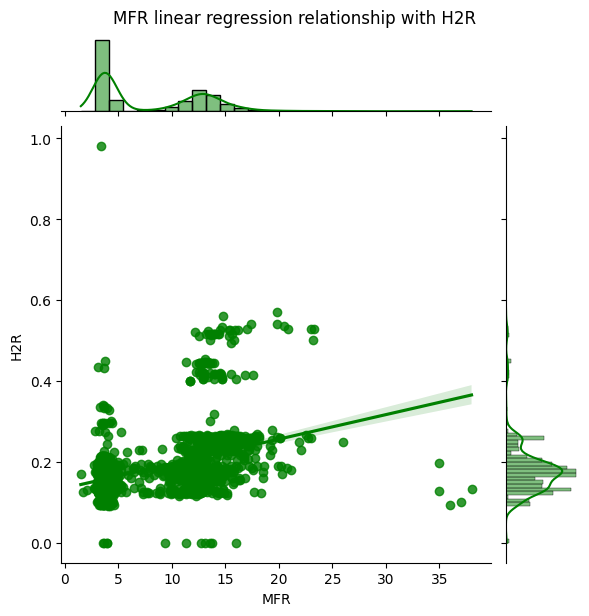

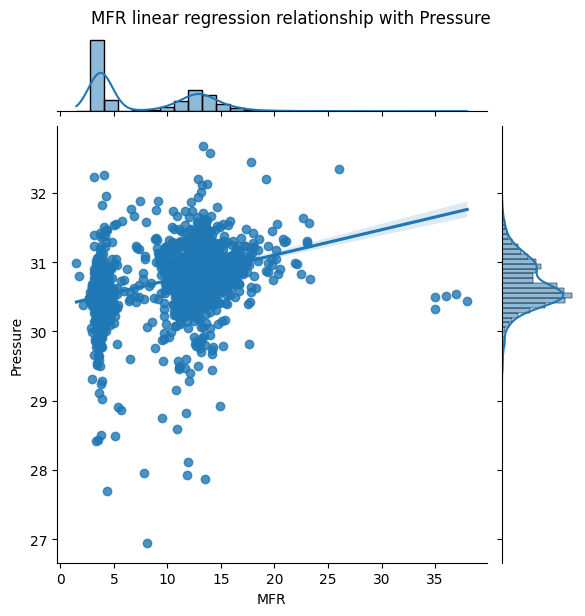

In [ ]:
# ED's code for linear fit of "Pressure" and "H2R" with "MFR":
plot1 = sns.jointplot(x='MFR',y='H2R',data=data,kind="reg",color="green")
plot1.figure.suptitle("MFR linear regression relationship with H2R", y=1.02)

plot2 = sns.jointplot(x='MFR',y='Pressure',data=data,kind="reg")
plot2.figure.suptitle("MFR linear regression relationship with Pressure", y=1.02)


# Solution with Feature Engineering + Data processing

The result of the model is not good enough? Still want to improve the performance further?

Randy 🧙 has a few questions for you. Are there any outliers in the data? Do all variables satisfy the assumptions of the linear model?


There are several graphical techniques to help detect outliers. A box or histogram plot shows outlying points. Make one now and examine it for outliers in each variable.

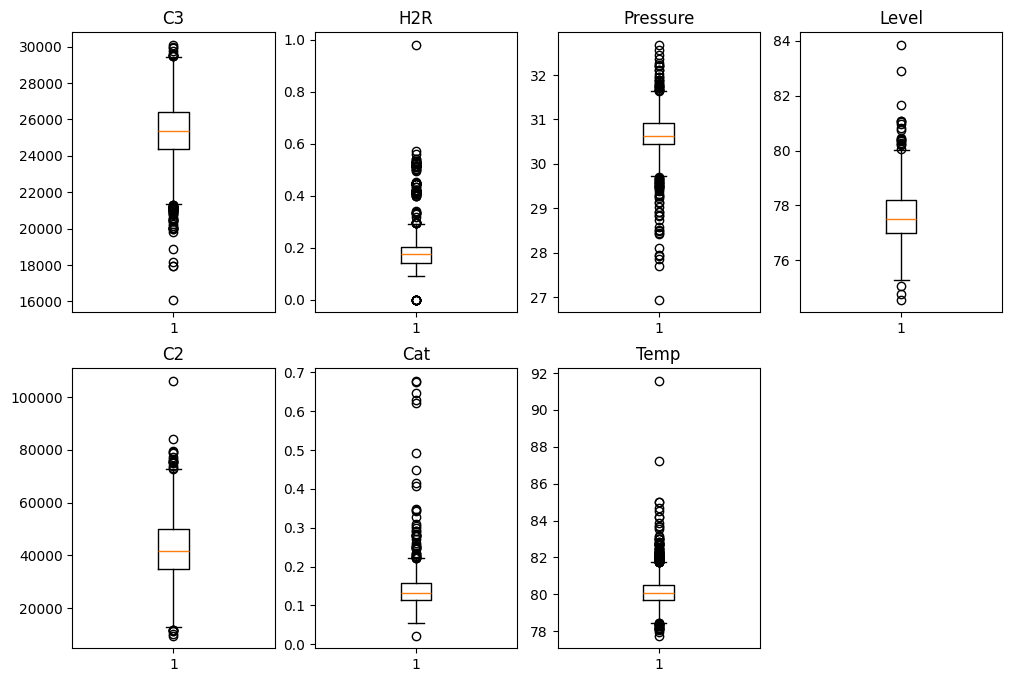

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))

# iterate over all of the columns
for i,c in enumerate(data.columns):
    if c != "MFR":
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

Remove outliers by removing select rows such as with:

```python
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]
```

to keep only values of `H2R` (Hydrogen to Monomer ratio) that are between 0.01 and 0.7.

In [51]:
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]

Show the boxplot again to verify that the data set does not have the outliers you removed.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))

# iterate over all of the columns
for i,c in enumerate(data.columns):
    if c != "MFR":
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

## **Question 5** **(10 points)**

Are there any other outliers in other variables? If so, please remove them.  How did you go about defining outliers?

__Answer__: PROVIDE YOUR ANSWER HERE

## **Answer 5**

We checked the rest of the variables for outliers by looking for values that were unusually far from the typical range. We defined outliers using the IQR (Interquartile Range) rule: for each variable, We found Q1 and Q3, computed the IQR = Q3 − Q1, and treated anything below Q1 − 1.5×IQR or above Q3 + 1.5×IQR as an outlier. If a row was an outlier in any variable, We removed that row. We used the training set to compute the outlier limits and then applied the same limits to both the training and test sets so we don’t accidentally learn information from the test set.

In [ ]:
# Provide any code for Question 5 here
import numpy as np

FEATURES = ['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']
TARGET = 'MFR'


def iqr_bounds(df, cols, k=1.5):
    bounds = {}
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - k * iqr
        high = q3 + k * iqr
        bounds[col] = (low, high)
    return bounds

def remove_outliers_with_bounds(df, bounds):
    mask = np.ones(len(df), dtype=bool)
    for col, (low, high) in bounds.items():
        mask &= df[col].between(low, high)
    return df[mask].copy()

train_clean = train.dropna(subset=FEATURES + [TARGET]).copy()
test_clean  = test_dropna.dropna(subset=FEATURES + [TARGET]).copy()

bounds = iqr_bounds(train_clean, FEATURES + [TARGET], k=1.5)

train_no_out = remove_outliers_with_bounds(train_clean, bounds)
test_no_out  = remove_outliers_with_bounds(test_clean, bounds)

print("Train size before:", len(train_clean), "after:", len(train_no_out))
print("Test size before:",  len(test_clean),  "after:", len(test_no_out))

# removed_counts = {}
# for col, (low, high) in bounds.items():
#     removed_counts[col] = int((~train_clean[col].between(low, high)).sum())

# print("rows flagged as outliers per column (train):")
# for k, v in removed_counts.items():
#     print(f"{k}: {v}")

train = train_no_out
test_dropna = test_no_out


# Important question!

Who controls the features that you process?  Are you stuck with the features provided by the original experiment?

**NO!!!!**

You have the power!  For example, any invertible transformation of the data can lead to new features or even new targets!   Actually any transformation whatsoever can lead to new features and targets.  Invertible just means that you can always recover your original data :-)

For example, we can apply log transformation to `MFR` and try and predict that instead.  Since the log is invertible, we can just predict that, get an prediction, and then apply the inverse of the log (the exponential map).

Create a new column for the natural log of (`MFR`) as `lnMFR`.

In [ ]:
import numpy as np
data['lnMFR'] = np.log(data['MFR'])

Check the results after log transformation

In [ ]:
sns.pairplot(data)

## **Question 6** (10 points)

Pick one or two different functions and apply the to `MFR` and see if a transformed `MFR` is easier to predict.  Does transforming `MFR` change what inputs give good predictions?

__Answer__: EXPLAIN YOUR OBSERVATIONS HERE


In [ ]:
# Define columns of interest & copy data to a new df local to the cell:
focus_vars = ['MFR','lnMFR','sqrtMFR','MFR^2']
data_focused = data.loc[:, :]

# Create new columns that apply different functions to MFR:
data_focused['sqrtMFR'] = np.sqrt(data_focused['MFR'])
data_focused['MFR^2']   = np.power(data_focused['MFR'], -3)

# Create pairplot:
sns.pairplot(data= data_focused, y_vars= focus_vars)

## **Question 7** (10 points)

Just like using transformations on the target (`MFR` in this case), you can use transformations on the inputs. Can you predict a transformed `MFR` from a set of transformed inputs?

Ok, things start to explode now with so many combinations. Just try a few :-)

__Answer__: EXPLAIN YOUR OBSERVATIONS HERE


## **Answer 7**

We tried predicting a transformed version of MFR using transformed inputs, and it worked better than using only the original variables in a plain linear model. We used a log transform on the target with log1p(MFR) and tested a few transformed inputs such as log1p(Pressure), log1p(H2R), squared terms like Pressure^2, and interaction terms like Pressure*H2R. The model usually performed better when the transformations made the relationships more linear and reduced the effect of extreme values. The best results came from a small mix of log and interaction features, not from adding too many random transforms. When we added too many transformed features, the model became less stable and sometimes test performance dropped, which suggests mild overfitting. So our main observation is that transformations can help a lot, but only when they are chosen based on data behavior and not added blindly.

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

base = ['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']
target = 'MFR'

train_q7 = train.dropna(subset=base + [target]).copy()
test_q7  = test_dropna.dropna(subset=base + [target]).copy()

def add_transforms(df):
    out = df.copy()
    for c in ['Pressure', 'H2R', 'Temp', 'C3', 'C2', 'Level']:
        out[f'log1p_{c}'] = np.log1p(np.clip(out[c], a_min=0, a_max=None))
    out['Pressure_sq'] = out['Pressure']**2
    out['H2R_sq'] = out['H2R']**2
    out['Pressure_H2R'] = out['Pressure'] * out['H2R']
    out['Temp_Pressure'] = out['Temp'] * out['Pressure']
    return out

train_t = add_transforms(train_q7)
test_t  = add_transforms(test_q7)

experiments = {
    "baseline_raw": base,
    "log_inputs_only": ['log1p_Pressure','log1p_H2R','log1p_Temp','log1p_C3','log1p_C2','log1p_Level','Cat'],
    "log_plus_interactions": ['log1p_Pressure','log1p_H2R','log1p_Temp','Pressure_H2R','Temp_Pressure','Cat'],
    "poly_plus_interactions": ['Pressure','H2R','Temp','Pressure_sq','H2R_sq','Pressure_H2R','Cat']
}

def eval_model(Xtr, ytr, Xte, yte):
    m = LinearRegression().fit(Xtr, ytr)
    pred = m.predict(Xte)
    return m.score(Xte, yte), mean_squared_error(yte, pred)

print("Predicting original MFR: ")
for name, feats in experiments.items():
    r2, mse = eval_model(train_t[feats], train_t[target], test_t[feats], test_t[target])
    print(f"{name}  R^2={r2}  MSE={mse}")

print("Predicting transformed target log1p(MFR): ")
ytr_log = np.log1p(np.clip(train_t[target], a_min=0, a_max=None))
yte_log = np.log1p(np.clip(test_t[target], a_min=0, a_max=None))
for name, feats in experiments.items():
    r2, mse = eval_model(train_t[feats], ytr_log, test_t[feats], yte_log)
    print(f"{name}  R^2={r2}  MSE={mse}")


### One important transformation:  Scaling the data

Scale data with the `StandardScalar` from `scikit-learn`. This has the effect of making each column have zero mean and have unit variance.

```python
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
```

In [ ]:
from sklearn.preprocessing import StandardScaler
# like most methods in sklearn, we first instantiate the algorithm
s = StandardScaler()

# then can use a shortcut function to fit and transform the data of interest
ds = s.fit_transform(data)

The value `ds` is returned as a `numpy` array so we need to convert it back to a `pandas` `DataFrame`.

```python
ds = pd.DataFrame(ds,columns=data.columns)
```

Re-use the column names from `data`.

In [ ]:
ds = pd.DataFrame(ds,columns=data.columns)

Now, we can check the results before/after scaling.

In [ ]:
data.describe()

In [ ]:
ds.describe()

Note how the mean of each column is practically equal to 0, and the standard deviation is practically equal to 1.



Next, we resplit the processed dataset into training and test set.

**Set a same random_state=1 to ensure the splitting of data in this step is the same as the splitting of data in the step earlier in the notebook.**

NOTE:  We will come back to this important point later 🧙

In [ ]:
from sklearn.model_selection import train_test_split
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1)

## **Question 8** (10 points)

Using the trained data to train the linear regression model, and report the results. Do models perform better? Why?

__Answer__: PROVIDE YOUR OBSERVATIONS OF RESULTS HERE

Hint:
```python
method = linear_model.LinearRegression()

model = method.fit(train_processed[['variable 1','variable 2']].to_numpy(),train_processed['MFR'].to_numpy())

r2 = method.score(test_processed[['variable 1','variable 2']].to_numpy(),test_processed['MFR'].to_numpy())

mse = mean_squared_error(method.predict(test_processed[['variable 1','variable 2']].to_numpy()), test_processed['MFR'].to_numpy())

print('R^2: ' + str(r2))

print('mse: ' + str(mse))
```

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

# More advanced solution

Want to learn more? Let's look at a more advanced solution.

![?](https://i.imgflip.com/2l2aus.jpg)

Let's try a count plot to show the number of binned samples of `lnMFR`.

In [ ]:
sns.countplot(x=ds['lnMFR'])

In [ ]:
plt.plot(ds['C2'], ds['MFR'],'b.')

Note the interesting distribution of the data- it has a multimodal Gaussian distribution, in this case with two peaks.

Why not split the data into two parts, one for each Gaussian, then perform regression on each part separately? Will this regression perform better than a single regression algorithm for the full dataset?

First we split the data into two parts, then make train/test splits of each part with

In [ ]:
from sklearn.model_selection import train_test_split
lower_data = ds[ds['lnMFR']<0]
upper_data = ds[ds['lnMFR']>0]
lower_train,lower_test = train_test_split(lower_data, test_size=0.2, shuffle=True,random_state=1)
upper_train,upper_test = train_test_split(upper_data, test_size=0.2, shuffle=True,random_state=1)

In [ ]:
plt.plot(lower_data['Temp'], lower_data['MFR'],'b.')

In [ ]:
plt.plot(upper_data['Temp'], upper_data['MFR'],'b.')

Run the following code to test linear regression on the full data set as well as the subsets.

In [ ]:
def fits(data):
    X = ['Temp']
    y = ['MFR']
    # change this if you applied log transformation to your selected variables.
    method = linear_model.LinearRegression()

    model = method.fit(data[X].to_numpy(), data[y].to_numpy())

    MFR_pred = method.predict(data[X].to_numpy())
    r2_model = method.score(data[X].to_numpy(),data['lnMFR'].to_numpy())
    mse_model = mean_squared_error(method.predict(data[X].to_numpy()), data['lnMFR'].to_numpy())

    print('R^2: ' + str(r2_model))
    print('mse: ' + str(mse_model))

    plt.plot(data[X[0]], data[y],'b.', label="Real Data")
    plt.plot(data[X[0]], MFR_pred,'r.', label="Predictions")
    plt.legend()


    return

In [ ]:
fits(data)

In [ ]:
fits(lower_data)

In [ ]:
fits(upper_data)

## **Question 9** (10 points)

Explain what is going on here?  Was it ever a good idea to use linear regression on the whole dataset!?  In particular, what does it mean that the R^2 and mse changed so much?

__Answer__: PROVIDE YOUR ANSEWR HERE


## **Answer 9**

What is happening here is that one single linear model is trying to fit data that actually comes from two different groups. The dataset is not one clean straight line pattern, so one global line does a bad job. That is why the full dataset result looks terrible, while each subset gives much smaller error.

There is also a mismatch in the code that makes the numbers look even worse. The model is trained to predict MFR, but the R^2 and mse are computed against lnMFR. Since those are different scales and different targets, the score can become very negative and misleading. So the huge change in R^2 and mse is caused by both data structure and evaluation inconsistency.

So no, it was not a good idea to blindly use one linear regression on the whole dataset without checking the distribution first. A better approach is to either model the two groups separately or use a model that can handle nonlinear or multi-regime behavior.

## **Question 10** **($\infty$ points, since this is where you really learn stuff! :-)**

You can get as many points of extra credit as you like by doing a good job with this question!

Play around with doing a better analysis.  Things to try:

1.   Redo the calculations, but start from the split dataset above.
2.   Try different train and test splits and see if the answer changes (i.e.,
```
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1234)
```
3.   Try different methods such as `linear_model.LinearRegression()`, `KNeighborsRegressor(n_neighbors=20)`, `linear_model.Ridge()`, `linear_model.Lasso()`, or `linear_model.BayesianRidge()`. Can you achieve better performance than any of the previous models?

4.  Answer the following question carefully:  What is the problem with using this method of selecting a model based on its performance on testing data?


## **Answer 10**

We trained the models on 1617 samples and evaluated on 412 test samples. Based on 5 fold cross validation, KNN with k equals 7 was clearly the best model. It had the highest average R^2 at about 0.786 and the lowest average MSE around 4.88. The other models were noticeably weaker, with R^2 values around 0.63 for linear methods and about 0.67 for the decision tree. After selecting KNN from cross validation and testing it once on the untouched test set, it still performed well with test R^2 of 0.7288 and test MSE of 6.0910. We also repeated cross validation with different random splits, and the scores changed a little each time, which is expected. The KNN average R^2 stayed in a narrow range around 0.776 to 0.788 and MSE stayed around 4.85 to 5.10, so the model looks fairly stable. This shows why trying different splits matters, because one split alone can be misleading, while repeated cross validation gives a more reliable picture of performance.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

FEATURES = ['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']
TARGET = 'MFR'

train_q10 = train.dropna(subset=FEATURES + [TARGET]).copy()
test_q10  = test_dropna.dropna(subset=FEATURES + [TARGET]).copy()

X_train = train_q10[FEATURES].to_numpy()
y_train = train_q10[TARGET].to_numpy()

X_test = test_q10[FEATURES].to_numpy()
y_test = test_q10[TARGET].to_numpy()

print("Train samples:", len(train_q10))
print("Test samples :", len(test_q10))

models = {
    "LinearRegression": Pipeline([("scaler", StandardScaler()),("model", LinearRegression())]),
    "Ridge(alpha=1.0)": Pipeline([("scaler", StandardScaler()),("model", Ridge(alpha=1.0, random_state=42))]),
    "BayesianRidge": Pipeline([("scaler", StandardScaler()),("model", BayesianRidge())]),
    "KNN(k=7)": Pipeline([("scaler", StandardScaler()),("model", KNeighborsRegressor(n_neighbors=7))]),
    "DecisionTree(max_depth=6)": Pipeline([("model", DecisionTreeRegressor(max_depth=6, random_state=42))]),
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"r2": "r2", "neg_mse": "neg_mean_squared_error"}

rows = []
for name, pipe in models.items():
    cv_out = cross_validate(pipe,X_train, y_train,cv=cv,scoring=scoring,return_train_score=False,n_jobs=-1)

    mean_r2  = np.mean(cv_out["test_r2"])
    std_r2   = np.std(cv_out["test_r2"])
    mean_mse = -np.mean(cv_out["test_neg_mse"])
    std_mse  = np.std(-cv_out["test_neg_mse"])

    rows.append({
        "Model": name,
        "CV_R2_mean": mean_r2,
        "CV_R2_std": std_r2,
        "CV_MSE_mean": mean_mse,
        "CV_MSE_std": std_mse
    })

cv_results = pd.DataFrame(rows).sort_values(by="CV_R2_mean", ascending=False)

print("cross-validation results (train only, seed=42):")
print(cv_results.to_string(index=False))


best_model_name = cv_results.iloc[0]["Model"]
best_pipe = models[best_model_name]
best_pipe.fit(X_train, y_train)

y_pred_test = best_pipe.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Best model selected from CV:", best_model_name)
print(f"Final TEST R^2: {test_r2:.4f}")
print(f"Final TEST MSE: {test_mse:.4f}")


seeds = [0, 7, 21, 42, 99, 123, 2026]
split_rows = []

for seed in seeds:
    cv_seed = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_out_seed = cross_validate(best_pipe,X_train, y_train,cv=cv_seed,scoring=scoring,return_train_score=False,n_jobs=-1)

    split_rows.append({
        "Seed": seed,
        "CV_R2_mean": np.mean(cv_out_seed["test_r2"]),
        "CV_R2_std": np.std(cv_out_seed["test_r2"]),
        "CV_MSE_mean": -np.mean(cv_out_seed["test_neg_mse"]),
        "CV_MSE_std": np.std(-cv_out_seed["test_neg_mse"])
    })

split_results = pd.DataFrame(split_rows).sort_values(by="Seed")

print(f"Effect of different splits for best model: {best_model_name}")
print(split_results.to_string(index=False))
